In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import pandas as pd
import numpy as np
import jqfactor_analyzer as ja


In [4]:
data = pd.read_csv('factor_info.csv', encoding='gbk', low_memory=False)
data['日期'] = pd.to_datetime(data['日期'], format="%Y-%m-%d")

In [5]:
data = data.set_index(['日期', '代码'])
data.head()

名称     最新报告期   最新年度报告期     同比报告期     环比报告期  是否为ST  \
日期         代码                                                               
2019-03-26 SZ000001   平安银行  20181231  20181231  20171231  20180930      0   
           SZ000002  万  科Ａ  20181231  20181231  20171231  20180930      0   
           SH600900   长江电力  20180930  20171231  20170930  20180630      0   
           SZ000063   中兴通讯  20180930  20171231  20170930  20180630      0   
           SZ000069   华侨城Ａ  20180930  20171231  20170930  20180630      0   

                     申万一级行业   上市天数          总市值  PE_TTM  ...  研发费用收入比_q  \
日期         代码                                            ...              
2019-03-26 SZ000001    申万银行  10310  20793368.16    8.38  ...       0.00   
           SZ000002   申万房地产  10283  31086252.03   10.05  ...       0.47   
           SH600900  申万公用事业   5607  37224000.00   16.60  ...       0.04   
           SZ000063    申万通信   7798  11877839.33  -18.01  ...      17.92   
           SZ000069   申万房地产   7867   5857714.13    6.51  ...       0.03   

                     研发费用股东权益比_q   流动比率  流动比率变动  应计利润占比_ttm  应计利润占2比_ttm  \
日期         代码                                                              
2019-03-26 SZ000001         0.00   0.00    0.00     -177.44         0.00   
           SZ000002         0.24  84.72    0.07       49.81       114.12   
           SH600900         0.01   5.11    1.00      145.70        23.60   
           SZ000063        10.08  70.99   -1.92       21.51      2862.14   
           SZ000069         0.00  80.14    0.09     -149.36      -442.53   

                      收现比_q  资产负债率  商誉股东权益比  业绩预告更新  
日期         代码                                        
2019-03-26 SZ000001    0.00  92.98     3.15       0  
           SZ000002  102.10  84.59     0.09       0  
           SH600900  108.33  54.09     0.00       0  
           SZ000063   74.56  72.33     0.91       1  
           SZ000069  122.48  74.36     0.33       0  

[5 rows x 43 columns]

In [6]:
data.columns

Index(['名称', '最新报告期', '最新年度报告期', '同比报告期', '环比报告期', '是否为ST', '申万一级行业', '上市天数',
       '总市值', 'PE_TTM', 'PB', '收盘价', 'curr_净利润_r', 'pre3q_净利润_r', 'curr_Q研发费用',
       'curr_净利润_q', 'pre3q_净利润_q', '经营现金流净额_ttm', 'EP', 'BP', '营业收入增长率_q',
       '净利润增长率_q', 'pre1q_营业收入增长率_q', 'pre1q_净利润增长率_q', '营业收入增长率变动',
       '净利润增长率变动', '扣非净利润增长率_q', '创新毛利润增长率_q', '创新毛利润增速标准分_q', 'ROE_cut_q',
       '改进DROE_q', 'ROE_ttm', 'ROE_avg', '研发费用收入比_q', '研发费用股东权益比_q', '流动比率',
       '流动比率变动', '应计利润占比_ttm', '应计利润占2比_ttm', '收现比_q', '资产负债率', '商誉股东权益比',
       '业绩预告更新'],
      dtype='object')

In [7]:
factor = data['净利润增长率_q'].unstack().iloc[:-10,:]
price = data['收盘价'].unstack()

In [11]:
far = ja.FactorAnalyzer(factor, price, quantiles=5, periods=(10,))

--Return--
> <ipython-input-12-6b98a5544c79>(2)<module>()->None
-> import pdb; pdb.set_trace()
(Pdb) tbreak 2
Breakpoint 2 at <ipython-input-12-6b98a5544c79>:2
(Pdb) l
  1  	# 生成统计图表
  2 B->	import pdb; pdb.set_trace()
  3  	far.create_full_tear_sheet(
  4  	    demeaned=False, group_adjust=False, by_group=False,
  5  	    turnover_periods=None, avgretplot=(5, 15), std_bar=False
  6  	)
[EOF]
(Pdb) tbreak 3
Breakpoint 3 at <ipython-input-12-6b98a5544c79>:3
(Pdb) c
Deleted breakpoint 3 at <ipython-input-12-6b98a5544c79>:3
> <ipython-input-12-6b98a5544c79>(3)<module>()->None
-> far.create_full_tear_sheet(
(Pdb) l
  1  	# 生成统计图表
  2 B	import pdb; pdb.set_trace()
  3  ->	far.create_full_tear_sheet(
  4  	    demeaned=False, group_adjust=False, by_group=False,
  5  	    turnover_periods=None, avgretplot=(5, 15), std_bar=False
  6  	)
[EOF]
(Pdb) s
> <ipython-input-12-6b98a5544c79>(4)<module>()->None
-> demeaned=False, group_adjust=False, by_group=False,
(Pdb) s
> <ipython-input-12-6b98a5544

(Pdb) ll
 73  ->	def plot_quantile_statistics_table(factor_data):
 74  	    quantile_stats = factor_data.groupby('factor_quantile') \
 75  	        .agg(['min', 'max', 'mean', 'std', 'count'])['factor']
 76  	    quantile_stats['count %'] = quantile_stats['count'] \
 77  	        / quantile_stats['count'].sum() * 100.
 78  	
 79  	    print("分位数统计")
 80  	    print_table(quantile_stats)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\plotting.py(74)plot_quantile_statistics_table()
-> quantile_stats = factor_data.groupby('factor_quantile') \
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\plotting.py(75)plot_quantile_statistics_table()
-> .agg(['min', 'max', 'mean', 'std', 'count'])['factor']
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\plotting.py(77)plot_quantile_statistics_table()
-> / quantile_stats['count'].sum() * 100.
(Pdb) quantile_stats
                          min       max          mean           std  co

,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-6.910226e+08,-11.81,-49890.393955,5.864552e+06,13884,20.143342
2,-5.077000e+01,7.50,-7.266190,1.136529e+01,13715,19.898152
3,-1.723000e+01,22.66,10.474042,5.832804e+00,13772,19.980849
4,6.520000e+00,62.71,31.483484,1.114369e+01,13714,19.896701
5,2.550000e+01,42353.60,448.236635,2.134178e+03,13841,20.080956


--Return--
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\plotting.py(80)plot_quantile_statistics_table()->None
-> print_table(quantile_stats)
(Pdb) n
--Return--
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(959)plot_quantile_statistics_table()->None
-> pl.plot_quantile_statistics_table(self._clean_factor_data)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1459)create_full_tear_sheet()
-> print("\n-------------------------\n")
(Pdb) n

-------------------------

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1460)create_full_tear_sheet()
-> self.plot_returns_table(demeaned=demeaned, group_adjust=group_adjust)
(Pdb) l
1455 	        - True: 显示标准差
1456 	        - False: 不显示标准差
1457 	        """
1458 	        self.plot_quantile_statistics_table()
1459 	        print("\n-------------------------\n")
1460 ->	        self.plot_returns_table(demeaned=demeaned, group_adjust=group_adjust)
1

(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(920)plot_returns_table()
-> by_date=True,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(921)plot_returns_table()
-> by_group=False,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(922)plot_returns_table()
-> demeaned=demeaned,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(923)plot_returns_table()
-> group_adjust=group_adjust,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(926)plot_returns_table()
-> pl.plot_returns_table(
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(927)plot_returns_table()
-> self.calc_factor_alpha_beta(demeaned=demeaned),
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(928)plot_returns_table()
-> mean_return_by_quantile,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfac

,period_10
Ann. alpha,-0.057
beta,0.622
Mean Period Wise Return Top Quantile (bps),1.150
Mean Period Wise Return Bottom Quantile (bps),-3.129
Mean Period Wise Spread (bps),4.373


--Return--
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(929)plot_returns_table()->None
-> mean_returns_spread
(Pdb) l
924  	        )
925  	
926  	        pl.plot_returns_table(
927  	            self.calc_factor_alpha_beta(demeaned=demeaned),
928  	            mean_return_by_quantile,
929  ->	            mean_returns_spread
930  	        )
931  	
932  	    def plot_turnover_table(self):
933  	        """打印换手率表"""
934  	        pl.plot_turnover_table(
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1461)create_full_tear_sheet()
-> self.plot_quantile_returns_bar(by_group=False,
(Pdb) l
1456 	        - False: 不显示标准差
1457 	        """
1458 	        self.plot_quantile_statistics_table()
1459 	        print("\n-------------------------\n")
1460 	        self.plot_returns_table(demeaned=demeaned, group_adjust=group_adjust)
1461 ->	        self.plot_quantile_returns_bar(by_group=False,
1462 	                                       

<Figure size 432x288 with 0 Axes>

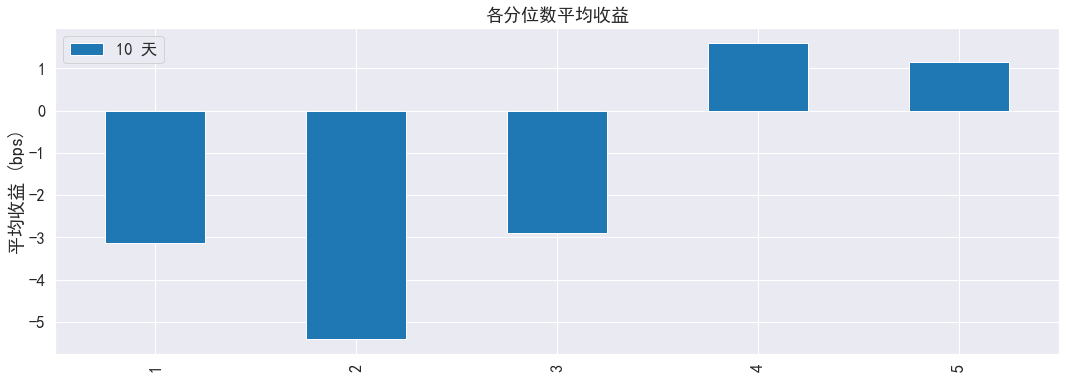

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1465)create_full_tear_sheet()
-> self.plot_cumulative_returns(period=None, demeaned=demeaned, group_adjust=group_adjust)
(Pdb) l
1460 	        self.plot_returns_table(demeaned=demeaned, group_adjust=group_adjust)
1461 	        self.plot_quantile_returns_bar(by_group=False,
1462 	                                       demeaned=demeaned,
1463 	                                       group_adjust=group_adjust)
1464 	        pl.plt.show()
1465 ->	        self.plot_cumulative_returns(period=None, demeaned=demeaned, group_adjust=group_adjust)
1466 	        pl.plt.show()
1467 	        self.plot_top_down_cumulative_returns(period=None,
1468 	                                              demeaned=demeaned,
1469 	                                              group_adjust=group_adjust)
1470 	        pl.plt.show()
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1466)create_full_tear_sheet()
-

<Figure size 432x288 with 0 Axes>

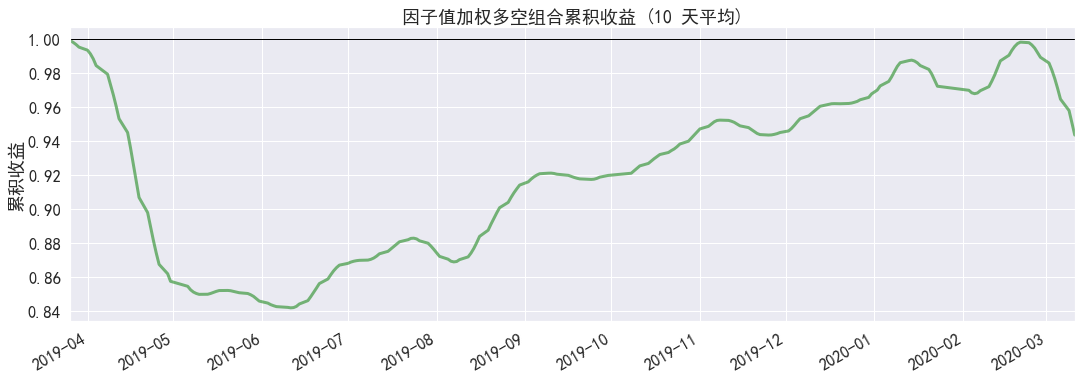

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1467)create_full_tear_sheet()
-> self.plot_top_down_cumulative_returns(period=None,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1468)create_full_tear_sheet()
-> demeaned=demeaned,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1469)create_full_tear_sheet()
-> group_adjust=group_adjust)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1470)create_full_tear_sheet()
-> pl.plt.show()
(Pdb) n


<Figure size 432x288 with 0 Axes>

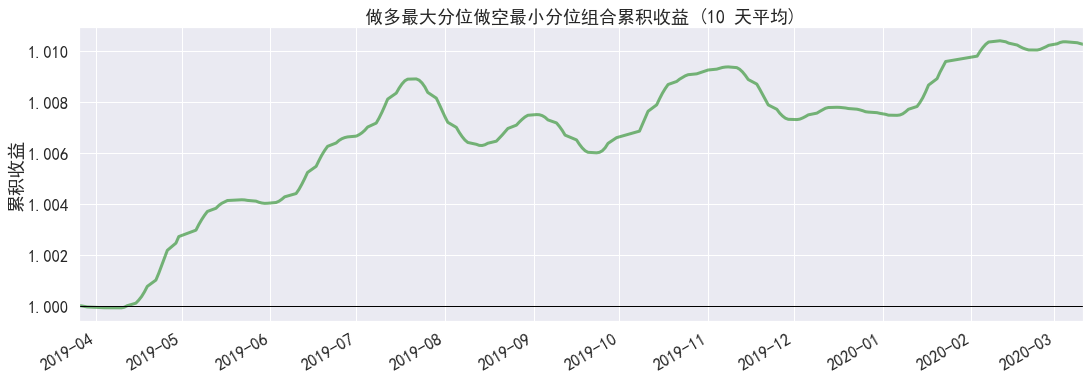

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1471)create_full_tear_sheet()
-> self.plot_cumulative_returns_by_quantile(period=None,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1472)create_full_tear_sheet()
-> demeaned=demeaned,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1473)create_full_tear_sheet()
-> group_adjust=group_adjust)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1474)create_full_tear_sheet()
-> self.plot_mean_quantile_returns_spread_time_series(demeaned=demeaned,
(Pdb) l
1469 	                                              group_adjust=group_adjust)
1470 	        pl.plt.show()
1471 	        self.plot_cumulative_returns_by_quantile(period=None,
1472 	                                                 demeaned=demeaned,
1473 	                                                 group_adjust=group_adjust)
1474 ->	        self.plot_mean_quantile

<Figure size 432x288 with 0 Axes>

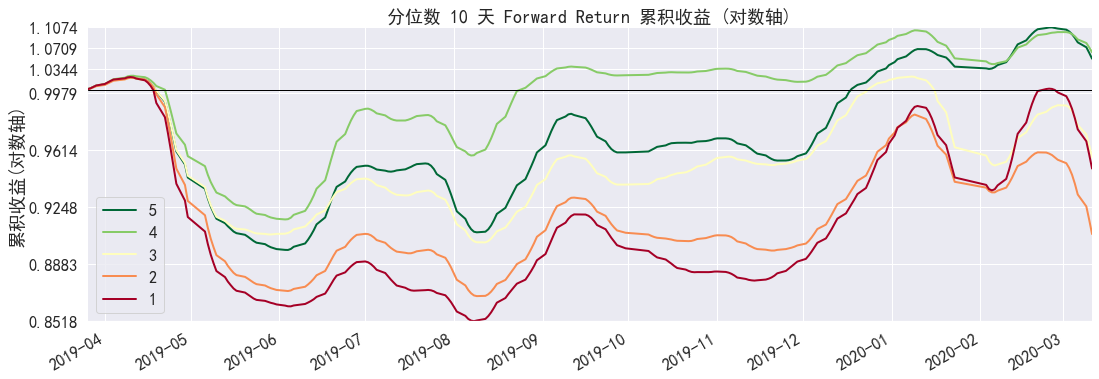

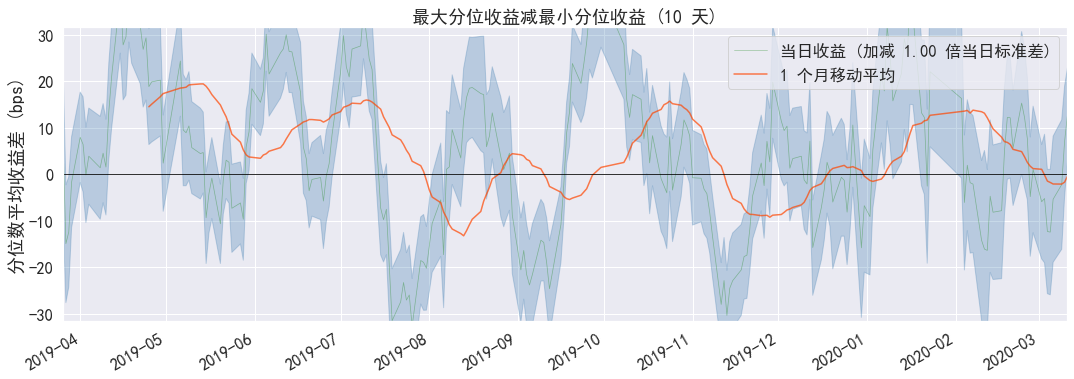

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1477)create_full_tear_sheet()
-> if by_group:
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1482)create_full_tear_sheet()
-> self.plot_quantile_returns_violin(demeaned=demeaned,
(Pdb) l
1477 	        if by_group:
1478 	            self.plot_quantile_returns_bar(by_group=True,
1479 	                                           demeaned=demeaned,
1480 	                                           group_adjust=group_adjust)
1481 	            pl.plt.show()
1482 ->	        self.plot_quantile_returns_violin(demeaned=demeaned,
1483 	                                          group_adjust=group_adjust)
1484 	        pl.plt.show()
1485 	        print("\n-------------------------\n")
1486 	        self.plot_information_table(group_adjust=group_adjust)
1487 	        self.plot_ic_ts(group_adjust=group_adjust, method=None)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\an

<Figure size 432x288 with 0 Axes>

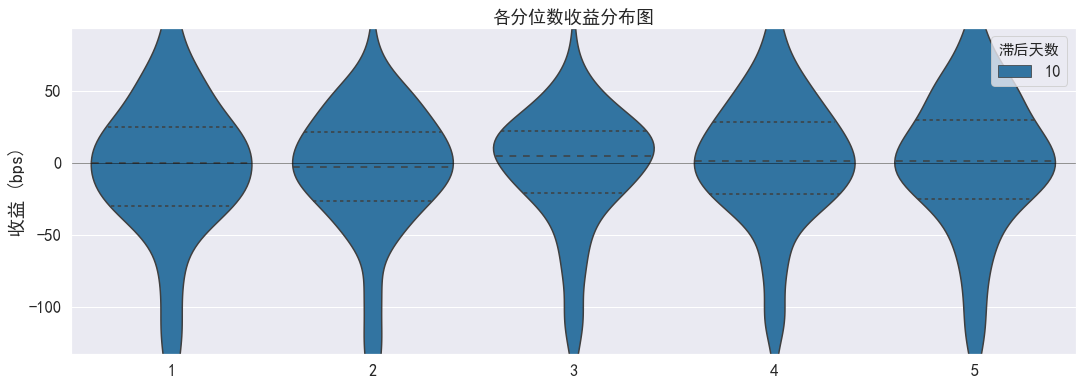

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1485)create_full_tear_sheet()
-> print("\n-------------------------\n")
(Pdb) n

-------------------------

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1486)create_full_tear_sheet()
-> self.plot_information_table(group_adjust=group_adjust)
(Pdb) n
IC 分析


,period_10
IC Mean,0.038
IC Std.,0.107
IR,0.350
t-stat(IC),5.360
p-value(IC),0.000
IC Skew,-0.053
IC Kurtosis,-0.402


> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1487)create_full_tear_sheet()
-> self.plot_ic_ts(group_adjust=group_adjust, method=None)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1488)create_full_tear_sheet()
-> pl.plt.show()
(Pdb) n


<Figure size 432x288 with 0 Axes>

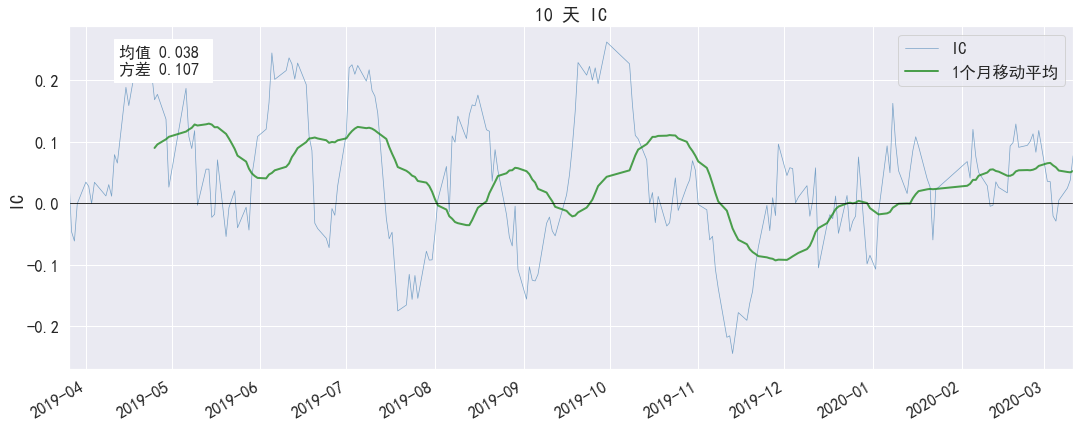

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1489)create_full_tear_sheet()
-> self.plot_ic_qq(group_adjust=group_adjust)
(Pdb) l
1484 	        pl.plt.show()
1485 	        print("\n-------------------------\n")
1486 	        self.plot_information_table(group_adjust=group_adjust)
1487 	        self.plot_ic_ts(group_adjust=group_adjust, method=None)
1488 	        pl.plt.show()
1489 ->	        self.plot_ic_qq(group_adjust=group_adjust)
1490 	        pl.plt.show()
1491 	        if by_group:
1492 	            self.plot_ic_by_group(group_adjust=group_adjust, method=None)
1493 	        else:
1494 	            self.plot_monthly_ic_heatmap(group_adjust=group_adjust)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1490)create_full_tear_sheet()
-> pl.plt.show()
(Pdb) n


<Figure size 432x288 with 0 Axes>

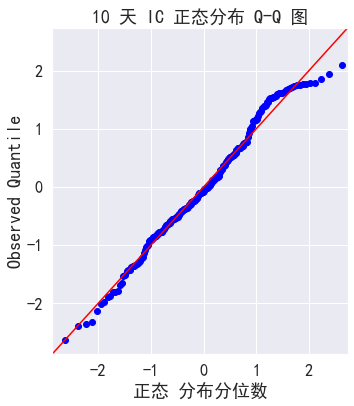

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1491)create_full_tear_sheet()
-> if by_group:
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1494)create_full_tear_sheet()
-> self.plot_monthly_ic_heatmap(group_adjust=group_adjust)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1495)create_full_tear_sheet()
-> pl.plt.show()
(Pdb) n


<Figure size 432x288 with 0 Axes>

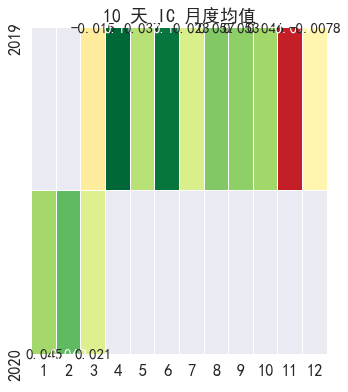

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1496)create_full_tear_sheet()
-> print("\n-------------------------\n")
(Pdb) n

-------------------------

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1497)create_full_tear_sheet()
-> self.plot_turnover_table()
(Pdb) n
换手率分析


,period_10
Quantile 1 Mean Turnover,0.105
Quantile 2 Mean Turnover,0.139
Quantile 3 Mean Turnover,0.136
Quantile 4 Mean Turnover,0.142
Quantile 5 Mean Turnover,0.123


,period_10
Mean Factor Rank Autocorrelation,0.887


> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1498)create_full_tear_sheet()
-> self.plot_top_bottom_quantile_turnover(periods=turnover_periods)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1499)create_full_tear_sheet()
-> pl.plt.show()
(Pdb) n


<Figure size 432x288 with 0 Axes>

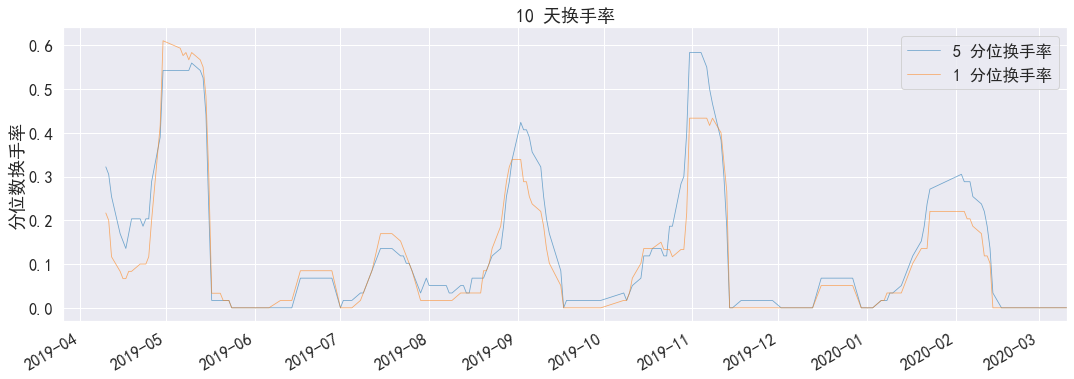

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1500)create_full_tear_sheet()
-> self.plot_factor_auto_correlation(periods=turnover_periods)
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1501)create_full_tear_sheet()
-> pl.plt.show()
(Pdb) n


<Figure size 432x288 with 0 Axes>

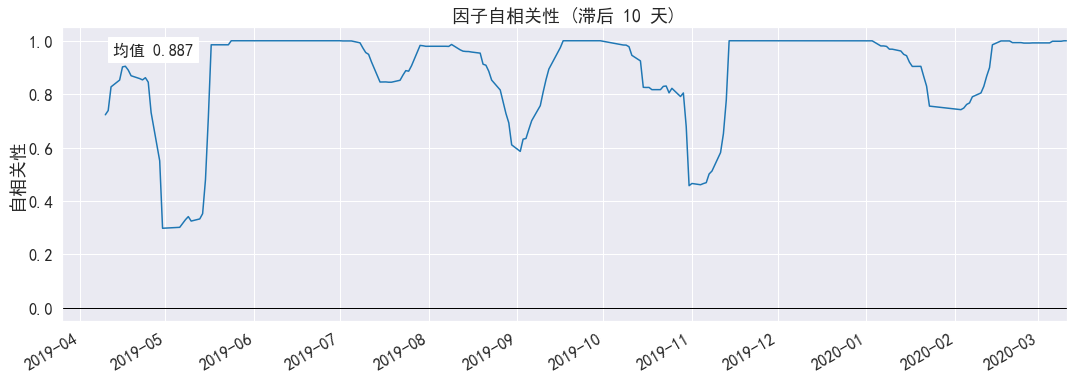

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1502)create_full_tear_sheet()
-> print("\n-------------------------\n")
(Pdb) n

-------------------------

> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1503)create_full_tear_sheet()
-> before, after = avgretplot
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1504)create_full_tear_sheet()
-> self.plot_quantile_average_cumulative_return(
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1505)create_full_tear_sheet()
-> periods_before=before, periods_after=after,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1506)create_full_tear_sheet()
-> by_quantile=False, std_bar=False,
(Pdb) n
> d:\programdata\anaconda3\lib\site-packages\jqfactor_analyzer\analyze.py(1507)create_full_tear_sheet()
-> demeaned=demeaned, group_adjust=group_adjust
(Pdb) n
KeyboardInterrupt
> d:\programdata\anaconda3\li

BdbQuit: 

In [12]:
# 生成统计图表
import pdb; pdb.set_trace()
far.create_full_tear_sheet(
    demeaned=False, group_adjust=False, by_group=False,
    turnover_periods=None, avgretplot=(5, 15), std_bar=False
)